### <center>Direct Access Digital Technical Test</center>

### Executive Summary

Hi Chris, I have gone through the data your dumped and completed some descriptive analysis on it. The dataset is an aggregation of campaign instances and their corresponding for one of Direct Access Digital's Account.

This account currently averages a click-through rate of 0.40, an average cost per click of 0.96 cents with an average cost per lead of $11.11 . A key feature of this dataset is the fact it is highly skewed. Out of 20 campaigns, the client has organized three huge campaigns that heavy skew is average.  Since these campaigns are the largest, I am also assuming these three campaigns they are Direct Access Digital's cash cow. 

![Images](Images/campaignx.jpg)

Out of the three campaigns I found only one Campaign 10 called "Brand - Mortgage (EN)" to be concerning. This campaign average a higher Cost per Click, and lower Click-through rate, while having a sizeable daily budget allocated to it. Even after looking at the Campaign at the Instance level I found that only 1 gradual spike against the general poor performance of the campaign. As this campaign is currently active, I would recommend diving a bit deep internally into this campaign.

![Images](Images/campaign10x.jpg)

Finally I would like to make some brief comments on the data for this client:

- "Target CPA" outperforms "Manual" For "Effective engine bid strategy name" (suprise!)
- French campaigns are cheaper then English
- There is litte data on the "Optimize" Ad rotation option to make a fair conclusion for this feature

I have a summary of my work below. Feel free to glance over my code for further review. Note that the following cells do not contain any additional premises but are presenting aggregated data and plots for validation.

## <center> Technical/Coding Proof </center>

### Assumptions

- For this problem I only looked at Active Campaigns
- Assuming "conversion rate" in Chris's email mean to click to lead conversion since we already have a click through rate
- The dataset contains a "From" columns and a campaign  columns which only contains a single value; "Account 1". Based on the numerical features of the dataset such as Avg CPC, Cost, and Clicks. I am assuming that each numerical feauter is an aggregated value between the "From" datetime stamp and the next record in the timeline.
- Assuming that Lead Start Total is the Total Amount of leads from the campaign as further feature documentation on dataset and domain knowledge is unavailable. I am probably wrong here since I lack the domain expertise behind this feature/column.

### Import Preliminaries

In [3]:
# Import generic data science packages and configurations
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting options
mpl.rcParams['figure.figsize'] = (15.0, 5.0)

# Ignore Warnings
warnings.filterwarnings('ignore')

### Import Data

In [4]:
# Import and Join data
sheet_1 = pd.read_csv('Data/sheet1.csv')
sheet_2 = pd.read_csv('Data/sheet2.csv', names=['Name','Campaign'])
sheet_1 = sheet_1[sheet_1['Status'] == 'Active']
sheet_1['Cost'] = sheet_1['Cost'].str.replace(',','').astype(float)
data = pd.merge(sheet_1, sheet_2, how='left', on='Campaign')

### Summary Stastics

In [5]:
# Print the summary statistics metrics across all our campaigns
print('-'*15, "Summary Statistics",'-'*15)
print('Average Click Through Rate:', data['Clicks'].sum() / data['Impr'].sum())
print('Average Cost Per Click:', data['Cost'].sum() / data['Clicks'].sum())
print('Average Campaign POS:',data['Quality score (avg)'].mean())
print('Average Cost Per Lead:',data['Cost'].sum() / data['Lead Start Total'].sum())

--------------- Summary Statistics ---------------
Average Click Through Rate: 0.4020861014203395
Average Cost Per Click: 0.9621572126995346
Average Campaign POS: 9.590486842105255
Average Cost Per Lead: 11.114958492106695


### Daily Bugdet

In [4]:
# View the mean daily budget for each campaign
data.groupby(['Campaign','Name'])[['Daily budget']].mean()

,,Daily budget
Campaign,Name,
Campaign 1,Brand - Rates - EDB CS (EN),11.000
Campaign 10,Brand - Mortgage (EN),152.525
Campaign 11,Brand - Homebuyers - First Time - EDB CS (EN),5.000
Campaign 12,Brand - Homebuyers - First Time (FR),5.000
Campaign 13,Brand - Rates (FR),11.000
Campaign 14,Brand - Mortgage - EDB CS (EN),50.000
Campaign 15,Brand - Mortgage - EDB CS (FR),5.000
Campaign 16,Brand - Promotions - EDB CS (EN),5.000
Campaign 17,Brand - Promotions - EDB CS (FR),5.000


### Bing vs Google Adwords

In [5]:
# View the Summary statistics by search engine
search_engine = data.groupby(['Engine'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
search_engine['Click Through Rate'] = search_engine['Clicks'] / search_engine['Impr']
search_engine['Cost Per Click'] = search_engine['Cost'] / search_engine['Clicks']
search_engine['Average Cost Per Lead'] = search_engine['Cost'] / search_engine['Lead Start Total']
search_engine['Click to Lead Conversion'] = search_engine['Lead Start Total'] / search_engine['Clicks']
search_engine

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Engine,,,,,,,,
Bing Ads,7761,22551,4604.850,588,0.344,0.593,7.831,0.076
Google AdWords,162009,399672,158740.580,14108,0.405,0.980,11.252,0.087


In [6]:
# Number of times a seach engine was used across all instances of a campaign
search_engine = data.groupby(['Engine'])['Status'].count()
search_engine

Engine
Bing Ads          273
Google AdWords    780
Name: Status, dtype: int64

#### Overall Campaign Performance

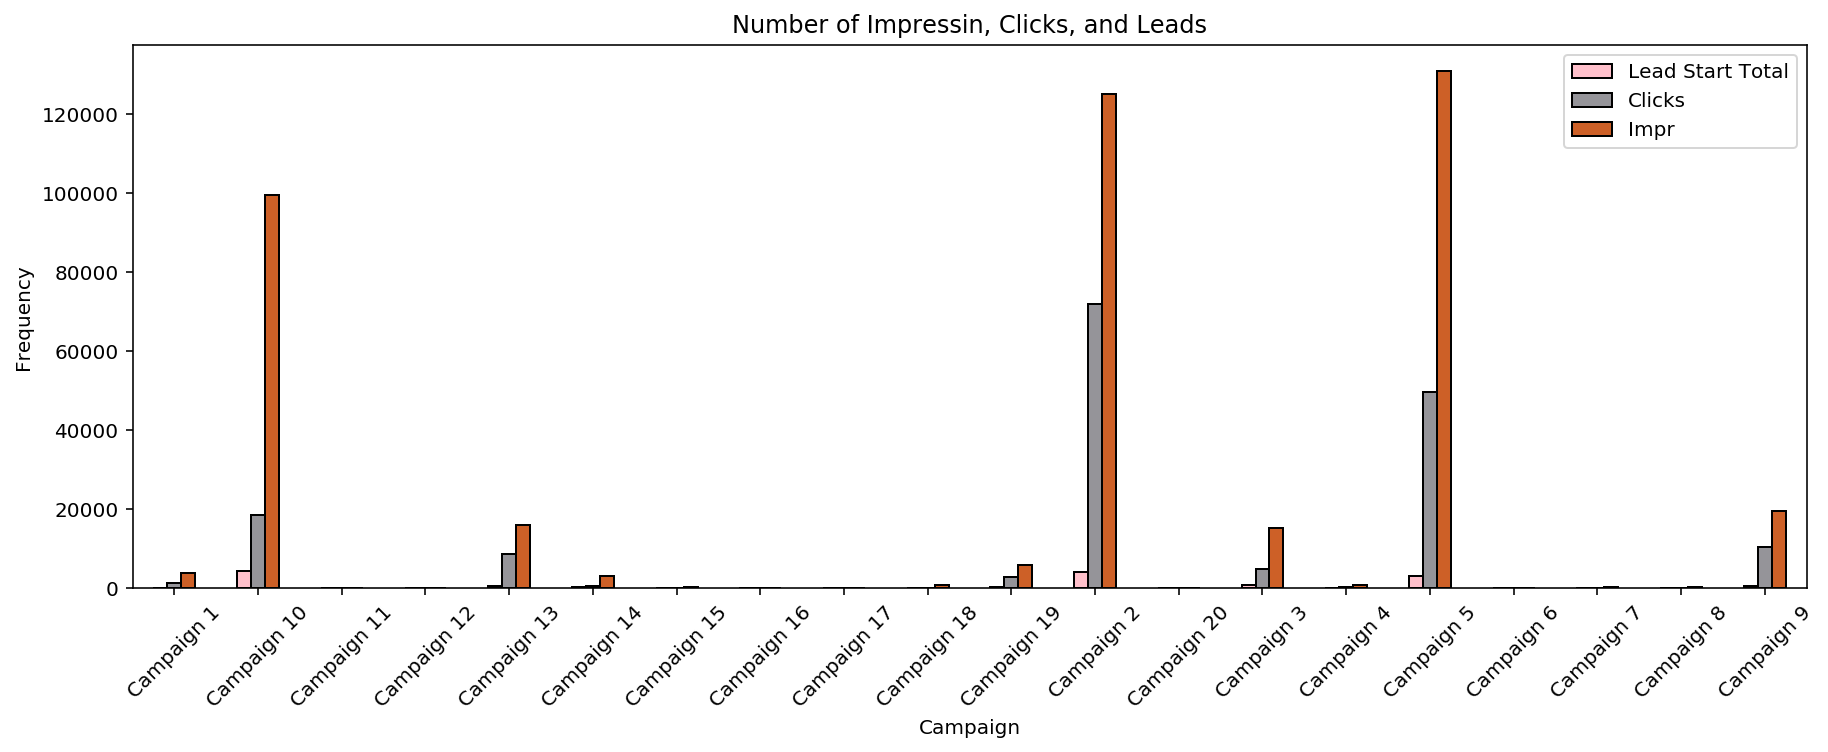

In [7]:
# Plot Campiang  Performance in a Barplot
mpl.rcParams['figure.figsize'] = (15.0, 5.0)
campaigns = data.groupby(['Campaign'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
campaigns[['Lead Start Total','Clicks','Impr',]].plot(kind='bar',  color=['pink','#959499','#CD6027',],
                                                edgecolor='black')
plt.title('Number of Impressin, Clicks, and Leads')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Save Plot
plt.savefig('Images/campaigns.jpg');

Originally, I wanted to use Campaign names in the plot above. But some of the campaign names we just too long for myu python plot this time. Secondly, Let's say we want to take a deeper look into the data. Lets have a look at the underlying data.

In [8]:
# View the underlying data with some additional metrics below
campaigns['Click Through Rate'] = campaigns['Clicks'] / campaigns['Impr']
campaigns['Cost Per Click'] = campaigns['Cost'] / campaigns['Clicks']
campaigns['Average Cost Per Lead'] = campaigns['Cost'] / campaigns['Lead Start Total']
campaigns['Click to Lead Conversion'] = campaigns['Lead Start Total'] / campaigns['Clicks']
campaigns.fillna(0)

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Campaign,,,,,,,,
Campaign 1,1283,3988,1339.710,113,0.322,1.044,11.856,0.088
Campaign 10,18538,99477,48965.640,4365,0.186,2.641,11.218,0.235
Campaign 11,20,37,38.020,2,0.541,1.901,19.010,0.100
Campaign 12,7,9,2.350,0,0.778,0.336,inf,0.000
Campaign 13,8651,15995,5209.640,571,0.541,0.602,9.124,0.066
Campaign 14,665,3211,1851.010,285,0.207,2.783,6.495,0.429
Campaign 15,147,384,107.010,42,0.383,0.728,2.548,0.286
Campaign 16,7,23,15.540,3,0.304,2.220,5.180,0.429
Campaign 17,0,0,0.000,0,0.000,0.000,0.000,0.000


### Campaign Performance vs Cost

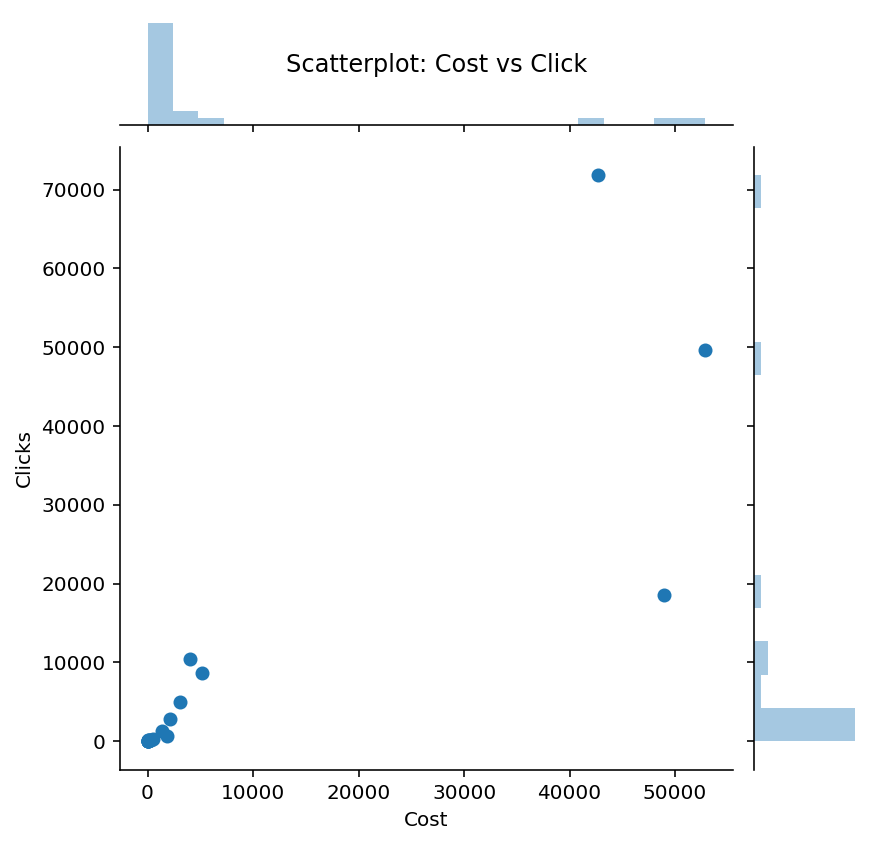

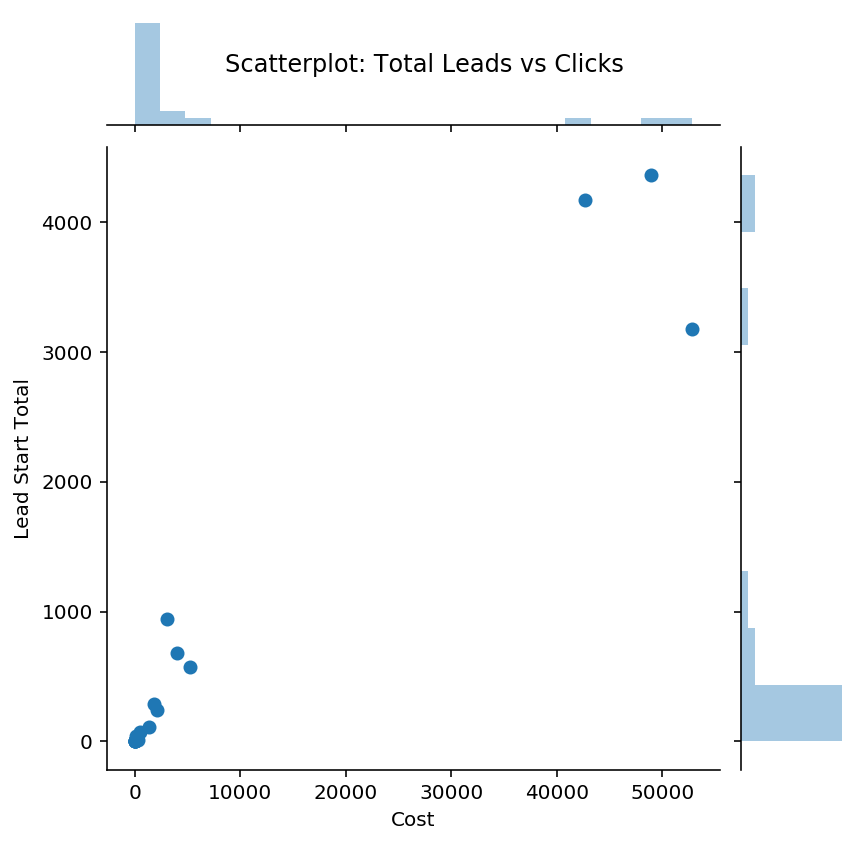

In [9]:
# Plot First Histogram
sns.jointplot(x="Cost", y="Clicks", data=campaigns)
plt.title('Scatterplot: Cost vs Click',y=1.1, x =-3, fontsize = 12);

# Plot Second Histogram
sns.jointplot(x="Cost", y="Lead Start Total", data=campaigns)
plt.title('Scatterplot: Total Leads vs Clicks',y=1.1, x =-3, fontsize = 12);

### Investigating Campaign 10

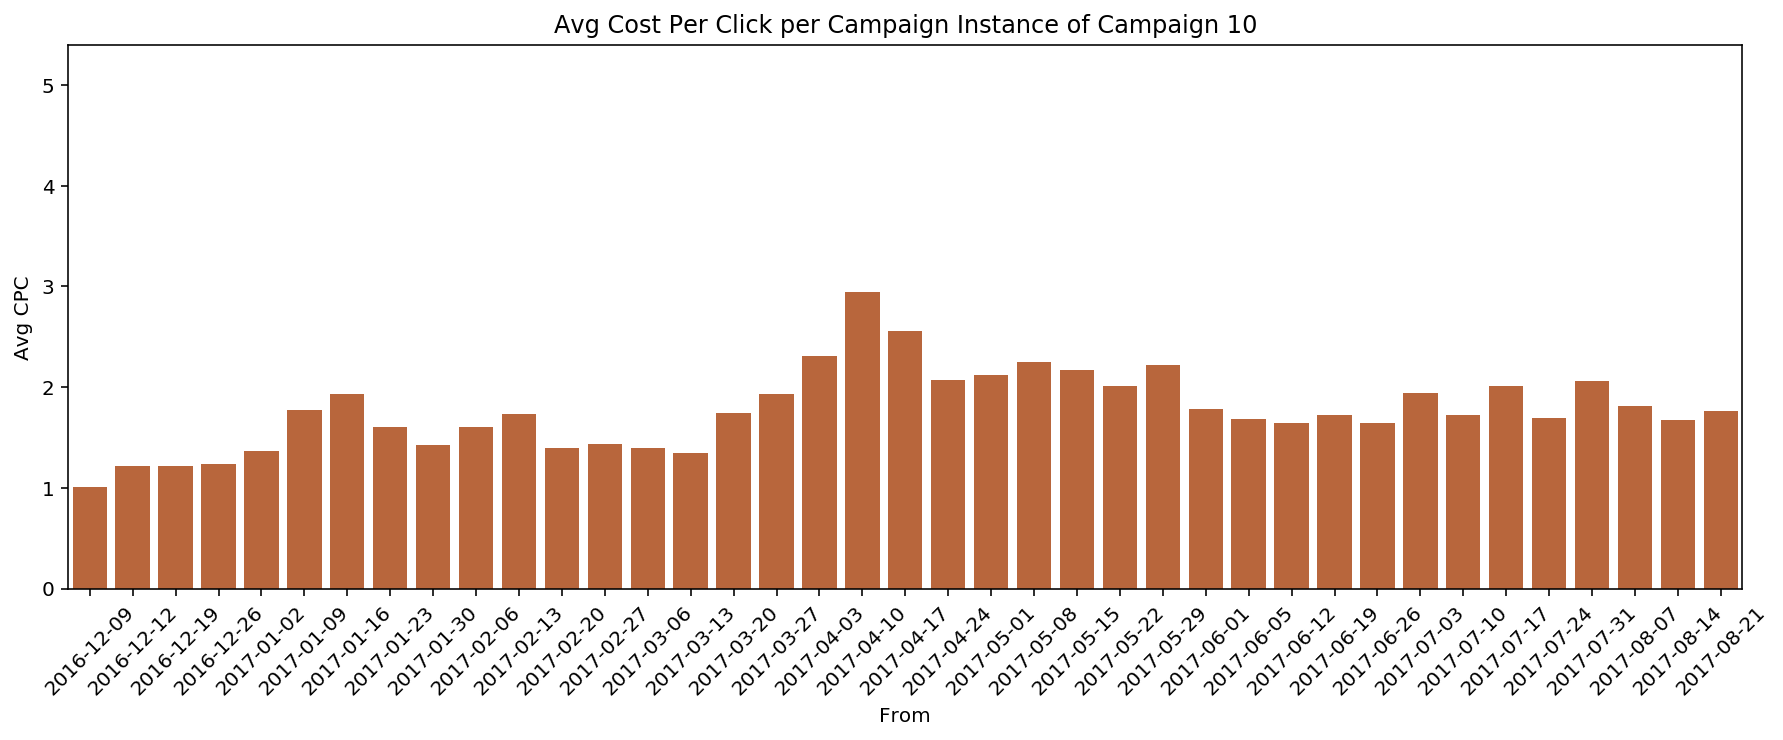

In [10]:
cap10 = data[data.Campaign == 'Campaign 10'].sort_values('From')
sns.barplot(x="From", y="Avg CPC", data=cap10, capsize=0, errwidth=0, color='#CD6027')
plt.title('Avg Cost Per Click per Campaign Instance of Campaign 10');
plt.xticks(rotation=40)
plt.xticks(rotation=45)

# Save Plot
plt.savefig('Images/campaign10.jpg');

### Comparing Top 3 Campaigns

In [11]:
# Filter the data for only the top 3 campaigns
top_3 = data[(data.Campaign.str.contains('Campaign 2')) | 
         (data.Campaign.str.contains('Campaign 5')) |
         (data.Campaign.str.contains('Campaign 10'))]
top_3 = top_3[(~top_3.Campaign.str.contains('Campaign 20'))]

top_3.groupby(['Campaign','Delivery method'])['Status'].count()

Campaign     Delivery method
Campaign 10  Accelerated        39
Campaign 2   Accelerated        39
Campaign 5   Accelerated        39
Name: Status, dtype: int64

In [12]:
# Comparing Ad Rotation between top 3 campaigns
top_3.groupby(['Campaign','Ad rotation'])['Status'].count()

Campaign     Ad rotation        
Campaign 10  Conversion optimize    39
Campaign 2   Conversion optimize    39
Campaign 5   Conversion optimize    39
Name: Status, dtype: int64

In [13]:
# Comparing bid strategy between top 3 campaigns
top_3.groupby(['Campaign','Effective engine bid strategy name'])['Status'].count()

Campaign     Effective engine bid strategy name
Campaign 10  (Target CPA)                          39
Campaign 2   (Target CPA)                          39
Campaign 5   (Target CPA)                          39
Name: Status, dtype: int64

In [14]:
# Comparing enginer usage between top 3 campaigns
top_3.groupby(['Campaign','Engine'])['Status'].count()

Campaign     Engine        
Campaign 10  Bing Ads          39
             Google AdWords    39
Campaign 2   Bing Ads          39
             Google AdWords    39
Campaign 5   Bing Ads          39
             Google AdWords    39
Name: Status, dtype: int64

In [15]:
# Comparing POS usage between top 3 campaigns
top_3.groupby(['Campaign','Engine'])['Avg pos'].mean()

Campaign     Engine        
Campaign 10  Bing Ads         1.472
             Google AdWords   1.087
Campaign 2   Bing Ads         1.389
             Google AdWords   1.038
Campaign 5   Bing Ads         1.449
             Google AdWords   1.086
Name: Avg pos, dtype: float64

### Comparing Campaign Bid Strategies

In [16]:
search_engine = data.groupby(['Effective engine bid strategy name'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
search_engine['Click Through Rate'] = search_engine['Clicks'] / search_engine['Impr']
search_engine['Cost Per Click'] = search_engine['Cost'] / search_engine['Clicks']
search_engine['Average Cost Per Lead'] = search_engine['Cost'] / search_engine['Lead Start Total']
search_engine['Click to Lead Conversion'] = search_engine['Lead Start Total'] / search_engine['Clicks']
search_engine

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Effective engine bid strategy name,,,,,,,,
(Target CPA),161081,397008,157566.910,13969,0.406,0.978,11.280,0.087
(manual),928,2664,1173.670,139,0.348,1.265,8.444,0.150


### Comparing Campaign Delivery Methods

In [17]:
delivery_method = data.groupby(['Delivery method'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
delivery_method['Click Through Rate'] = delivery_method['Clicks'] / delivery_method['Impr']
delivery_method['Cost Per Click'] = delivery_method['Cost'] / delivery_method['Clicks']
delivery_method['Average Cost Per Lead'] = delivery_method['Cost'] / delivery_method['Lead Start Total']
delivery_method['Click to Lead Conversion'] = delivery_method['Lead Start Total'] / delivery_method['Clicks']
delivery_method

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Delivery method,,,,,,,,
Accelerated,138355,349331,145737.850,11885,0.396,1.053,12.262,0.086
Standard,23654,50341,13002.730,2223,0.470,0.550,5.849,0.094


### Comparing Campaign Language

In [18]:
language = data.groupby(['Language'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
language['Click Through Rate'] = language['Clicks'] / language['Impr']
language['Cost Per Click'] = language['Cost'] / language['Clicks']
language['Average Cost Per Lead'] = language['Cost'] / language['Lead Start Total']
language['Click to Lead Conversion'] = language['Lead Start Total'] / language['Clicks']
language

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Language,,,,,,,,
en,138435,349835,146268.810,11903,0.396,1.057,12.288,0.086
fr,23574,49837,12471.770,2205,0.473,0.529,5.656,0.094


### Comparing Ad rotation

In [19]:
rotation = data.groupby(['Ad rotation'])[['Clicks','Impr','Cost','Lead Start Total']].sum()
rotation['Click Through Rate'] = rotation['Clicks'] / rotation['Impr']
rotation['Cost Per Click'] = rotation['Cost'] / rotation['Clicks']
rotation['Average Cost Per Lead'] = rotation['Cost'] / rotation['Lead Start Total']
rotation['Click to Lead Conversion'] = rotation['Lead Start Total'] / rotation['Clicks']
rotation

,Clicks,Impr,Cost,Lead Start Total,Click Through Rate,Cost Per Click,Average Cost Per Lead,Click to Lead Conversion
Ad rotation,,,,,,,,
Conversion optimize,161830,398840,158399.670,14100,0.406,0.979,11.234,0.087
Optimize,179,832,340.910,8,0.215,1.905,42.614,0.045


Author: Kavi Sekhon